In [1]:
# import library pandas
import pandas as pd
# call the standfordsentimenttreesbank
data1= pd.read_csv('datasetSentences.txt',sep ='\t', header=None) 
data3= pd.read_csv('datasetSplit.txt',sep =',', header=None)
data5 = pd.read_csv('sentiment_labels.txt',sep ='|', header=None)
#delete column 1 in every column data
data2 = data1.drop(0,1)
data4 = data3.drop(0,1)
data6 = data5.drop(0,1)
#change column name in every column
data2.columns =['sentences']
data4.columns =['datasplit']
data6.columns =['Sentiment_value']
#delete first raw in every column
data2_drop = data2.drop(data2.index[0])
data4_drop = data4.drop(data4.index[0])
data6_drop = data6.drop(data4.index[0])
#merge all columns
data2['datasetsplit'] = data4_drop
data2_drop= data2.drop(data2.index[0])
data2_drop['sentimenvalue'] = data6_drop
#initialize data2_drop to data
data = data2_drop
#print data 
data

,sentences,datasetsplit,sentimenvalue
1,The Rock is destined to be the 21st Century 's...,1,0.5
2,The gorgeously elaborate continuation of `` Th...,1,0.5
3,Effective but too-tepid biopic,2,0.44444
4,If you sometimes like to go to the movies to h...,2,0.5
5,"Emerges as something rare , an issue movie tha...",2,0.42708
...,...,...,...
11851,A real snooze .,1,0.44444
11852,No surprises .,1,0.19444
11853,We 've seen the hippie-turned-yuppie plot befo...,1,0.61111
11854,Her fans walked out muttering words like `` ho...,1,0.72222


In [2]:
# split data and train,test data
from sklearn.model_selection import train_test_split
sentences = data['sentences']
y = data.datasetsplit
sentences_train,sentences_test,y_train,y_test=train_test_split(sentences,y,test_size=0.33)

In [3]:
# extraction data
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)
X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

In [7]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
print(sentences_train[2])
print(X_train[2])

The gorgeously elaborate continuation of `` The Lord of the Rings '' trilogy is so huge that a column of words can not adequately describe co-writer\/director Peter Jackson 's expanded vision of J.R.R. Tolkien 's Middle-earth .
[11, 69, 3364, 9, 1500, 4, 33, 1, 706, 3, 87, 1347, 69, 6, 4170, 128, 1, 232]


In [10]:
from keras.preprocessing.sequence import pad_sequences
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
print(X_train[0, :])

[2789 1499    6  818  169  167   21 3360 4169 3361    6 1346   34   17
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [11]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           745250    
_________________________________________________________________
flatten_1 (Flatten)          (None, 5000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                50010     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 795,271
Trainable params: 795,271
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(X_train, y_train,epochs=5,verbose=False,validation_data=(X_test, y_test),batch_size=10)

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()


Training Accuracy: 0.7166
Testing Accuracy:  0.7291


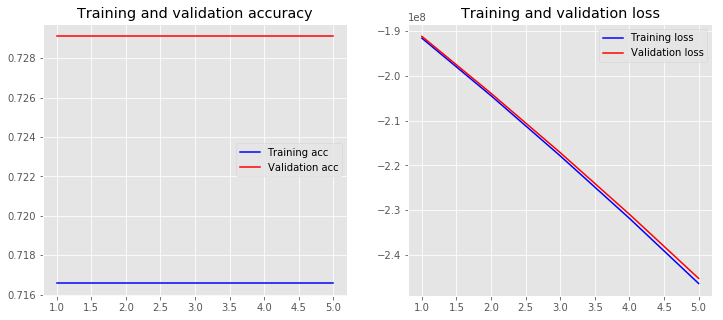

In [16]:
plot_history(history)